Loading Data and Exploring

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler


DATA_PATH = Path("/Users/nadaashraf/Heart_Disease_Project/data/heart_disease_uci.csv")

if not DATA_PATH.exists():
    raise FileNotFoundError(f"Could not find {DATA_PATH}. Put your CSV inside /data.")


df = pd.read_csv(DATA_PATH)
print("Raw shape:", df.shape)
df.head()

Raw shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)

Dataset Shape: (920, 16)
Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


Handling Missing Data

In [5]:
#handeling missing values by imputating with median of the numerical column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("num")
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/3831772110.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/3831772110.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [6]:
# Categorical values we will fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/4016834920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/4016834920.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].

Standardization

In [7]:
#Encode categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

#Standardize numerical features
scaler = StandardScaler()

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Matplotlib is building the font cache; this may take a moment.


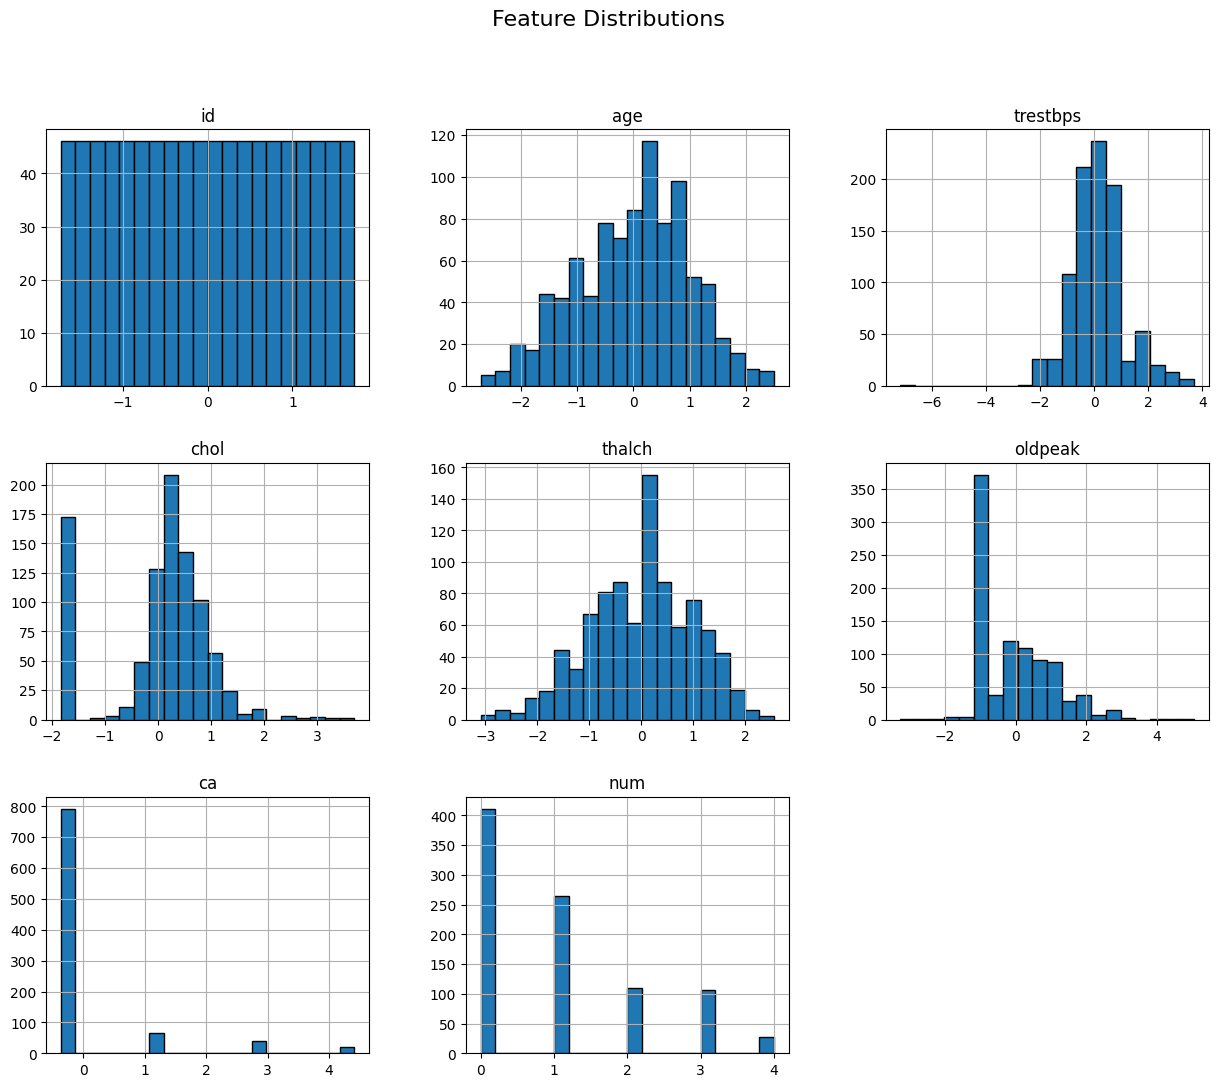

In [9]:
# Feature Distributions
import matplotlib.pyplot as plt
df.hist(figsize=(15,12), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


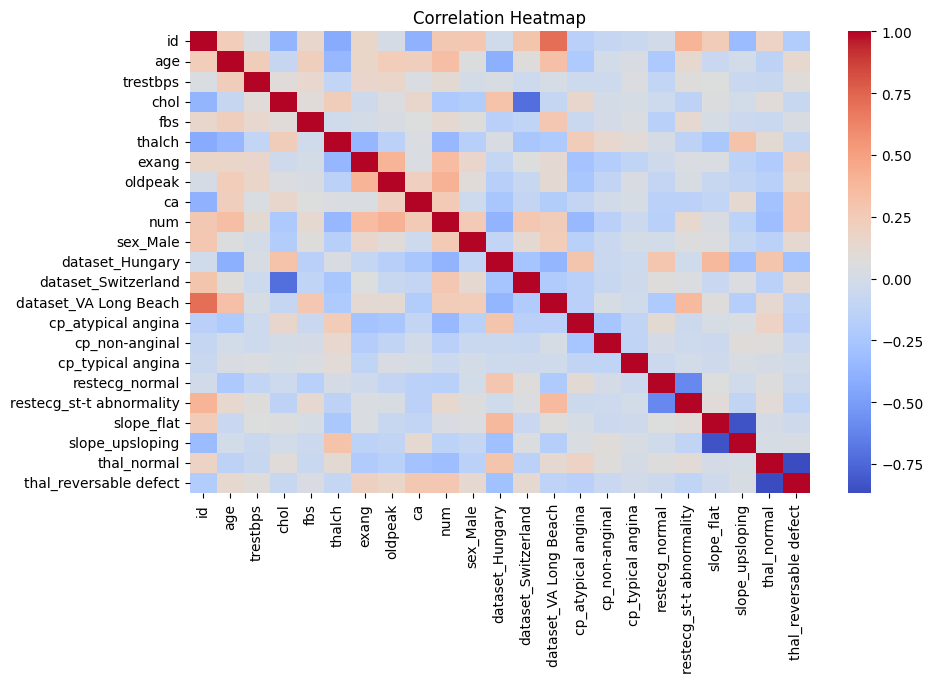

In [10]:
# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/2060723994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=df, palette="viridis")


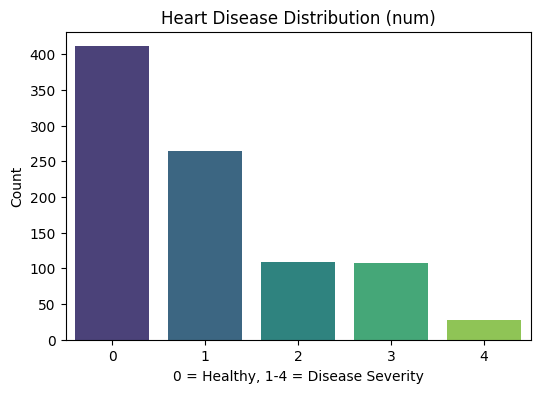

In [11]:
# EDA of the target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x="num", data=df, palette="viridis")
plt.title("Heart Disease Distribution (num)")
plt.xlabel("0 = Healthy, 1-4 = Disease Severity")
plt.ylabel("Count")
plt.show()

/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/3657382814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="age", data=df, palette="Set2")


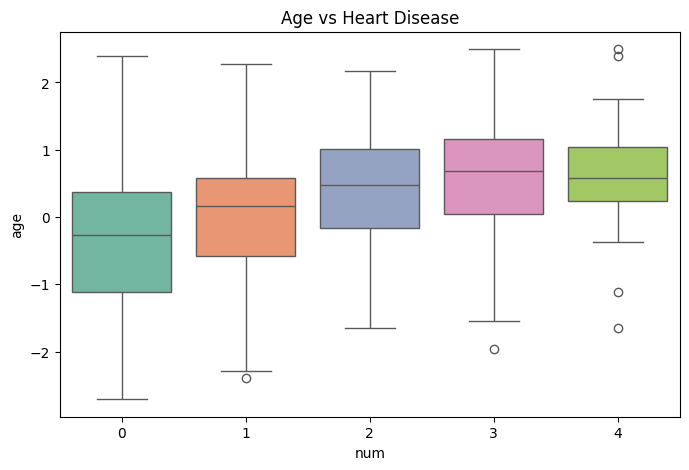

In [12]:
# Age distribution vs target
plt.figure(figsize=(8,5))
sns.boxplot(x="num", y="age", data=df, palette="Set2")
plt.title("Age vs Heart Disease")
plt.show()

/var/folders/1b/267rt42x4q944239m9kb988h0000gn/T/ipykernel_18912/2078939550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y="thalch", data=df, palette="Set3")


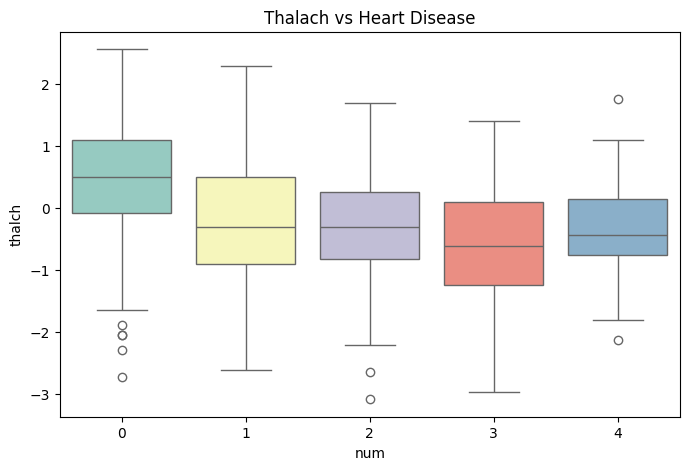

In [13]:
# Thalach vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(x="num", y="thalch", data=df, palette="Set3")
plt.title("Thalach vs Heart Disease")
plt.show()


In [14]:
OUT_PATH = Path("/Users/nadaashraf/Heart_Disease_Project/data/cleaned_heart.csv")
df.to_csv(OUT_PATH, index=False)
print("Cleaned dataset saved to:", OUT_PATH.resolve())
print("Final shape:", df.shape)


Cleaned dataset saved to: /Users/nadaashraf/Heart_Disease_Project/data/cleaned_heart.csv
Final shape: (920, 23)
